## Lab 1 - Analyzing Real Estate Data in St. Petersburg
We have data from Yandex.Realty classified https://realty.yandex.ru containing real estate listings for apartments in St. Petersburg and Leningrad Oblast from 2016 till the middle of August 2018. In this Lab you'll learn how to work with datasets in python using pandas library for data analysis using the provided data. 
For datasets like this it becomes hard to use Excel because of its size. If you learn how to work with pandas you'll be able to do basic analytical research much faster than in Excel.
To execute code IPython notebook click on the Cell and press Shift-Enter.
If you don't have any experience with Jupyter notebooks, please look at this tutorial: https://mybinder.org/v2/gh/ipython/ipython-in-depth/master?filepath=binder/Index.ipynb

### Main objectives
After successful completion of the lab work students will be able to:
-	Analyze large datasets that don't work well in Excel using IPython notebook and pandas library
-   Find outliers and remove them in the datasets
-	Calculate different statistics on data fields


### Tasks
-	Calculate median and mean sell and rent prices in St. Petersburg
-   Find outliers: too cheap or too expensive apartments which seem to be a wrong data. Remove them from the dataset.
-	Find houses with the most cheapest and most expensive prices per square meter.
-   Analyze how many rent offers have the commission and what is the most popular commission



In [1]:
# let's import pandas library and set options to be able to view data right in the browser
# Assign pd for a short alias for pandas library
import pandas as pd
# Call set_option function fron pandas library to edit them limit for number of the displayed
# columns, width of all columns and maximum width of one column
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [2]:
# we see that it's tab separated file, we can load it with pd.read_table method
# load our dataset and see which data it contains.
# HINT: you can type 'Tab' after starting typing the filename and IPython will automatically fill it for you
# After this command a new variable will be created (spb_df) containing pandas dataframe with data in our file
# You can think of dataframe structure as an analogue of Excel sheet
spb_df = pd.read_table('~/__DATA/E2ESML_Spring2023/data/spb.real.estate.archive.2018.tsv')

In [3]:
# let's check how much data in terms of rows we have where each row represent 
# one offer from Yandex.Realty
len(spb_df)

429187

In [4]:
# let's look at random sample of size 10 of the loaded dataset to understand what's inside
spb_df.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
385191,8576843521297587201,2018-06-28T00:00:00+03:00,2018-07-09T00:00:00+03:00,23000.0,13,False,1,False,38.0,12.0,17.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Южное шоссе, 49к2",2741634337766537844
343849,4892569562221298177,2018-05-03T00:00:00+03:00,2018-08-20T00:00:00+03:00,3300000.0,3,False,1,False,35.6,10.0,16.0,NaN,3.0,1,2,"Россия, Ленинградская область, Всеволожский район, Бугровское сельское поселение, посёлок Бугры, Воронцовский бульвар, 5к2",4275479386816799218
423476,2789406746021729280,2018-08-14T00:00:00+03:00,2018-08-20T00:00:00+03:00,3400000.0,8,False,1,False,28.9,6.6,15.0,NaN,8.0,1,2,"Россия, Санкт-Петербург, улица Турку, 9к4",442081277675679581
21489,9155043462119384806,2015-01-27T00:00:00+03:00,2016-02-15T00:00:00+03:00,3500000.0,5,False,3,False,60.0,6.6,44.0,NaN,0.0,1,2,"Россия, Ленинградская область, Ломоносовский район, Виллозское сельское поселение, деревня Малое Карлино, 21",6217414888818595034
297444,8346688379995413504,2018-02-22T00:00:00+03:00,2018-02-26T00:00:00+03:00,15000.0,5,False,1,False,32.0,5.0,18.0,60.0,NaN,2,2,"Россия, Санкт-Петербург, Кронштадт, улица Сургина, 6",4027464987447605179
89034,9069199666280486067,2015-03-12T00:00:00+03:00,2018-02-07T00:00:00+03:00,4300000.0,1,False,3,False,67.0,8.2,42.8,NaN,0.0,1,2,"Россия, Санкт-Петербург, Ломоносов, улица Победы, 34к1",614800101836485553
108111,7319387958562209792,2016-11-03T00:00:00+03:00,2016-11-21T00:00:00+03:00,23000.0,4,False,1,False,33.0,6.0,18.0,25.0,0.0,2,2,"Россия, Санкт-Петербург, Алтайская улица, 11",6325802637859127194
177683,7253369291645216256,2017-05-30T00:00:00+03:00,2018-04-04T00:00:00+03:00,9000000.0,2,False,2,False,54.0,7.0,33.0,NaN,1.0,1,2,"Россия, Санкт-Петербург, Кузнецовская улица, 17",687443817426836736
367662,9174606537144977525,2018-06-06T00:00:00+03:00,2018-06-22T00:00:00+03:00,2600000.0,4,False,0,True,21.8,NaN,14.1,NaN,6.0,1,2,"Россия, Санкт-Петербург, Кондратьевский проспект, 70к1",1081182048329110314
342186,4013556772912464640,2018-04-30T00:00:00+03:00,2018-05-03T00:00:00+03:00,16000.0,4,False,1,False,32.0,7.0,16.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Брюсовская улица, 12",2416327057518580797


In [5]:
len(spb_df)

429187

In [6]:
spb_df.sample(5000).to_csv('spb.real.estate.archive.sample5000.tsv', index = False, sep='\t')

### Analyze prices for rent and sell
We see that we have both RENT and SELL data. 
<p>offer_type column contains data to distinct them, 2 stands for RENT, 1 for SELL


#### Analyze rent prices

In [7]:
# at first let's split our dataframe to rent and sell
# Select some part of dataframe according to conditions in brackets
rent_df = spb_df[spb_df.offer_type == 2]
sell_df = spb_df[spb_df.offer_type == 1]
# .format function allows you to put variales' values instead of {} in the final string
print("Total rent data size: {}".format(len(rent_df)))
print("Total sell data size: {}".format(len(sell_df)))

Total rent data size: 171186
Total sell data size: 258001


In [8]:
# let's check median and price for renting apartments
# .last_price indicates that you use data just from the column named last_price
rent_median_price = rent_df.last_price.median()
rent_mean_price = rent_df.last_price.mean()
print("Rent median price: {}".format(rent_median_price))
print("Rent mean price: {}".format(rent_mean_price))

Rent median price: 25000.0
Rent mean price: 31719.256638977487


In [9]:
# Just to look at data of one column you can select this column. 
# 'head' function will take only first rows 
rent_df.last_price.head(10)

1086    20000.0
1096    40000.0
1097    45000.0
1149    21000.0
1514    25000.0
1515    35000.0
1516    22000.0
1537    20000.0
1555    26000.0
1695    25000.0
Name: last_price, dtype: float64

#### Let's look at the most expensive apartments in rent

In [10]:
# .max function returns the maximum value across all rows
max_price_rent = rent_df.last_price.max()

In [11]:
print("Max price in rent: {}".format(max_price_rent))

Max price in rent: 4900000.0


In [12]:
# Now select all offers where price is equal to maximum value across all rent prices
rent_df_max = rent_df[rent_df.last_price == max_price_rent]

In [13]:
rent_df_max

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
123675,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607


We can see that it was probably a mistake. It's hard to imagine why an aparment could cost 4.9 mln rubles per month. To analyze it let's look at the random sample of rent offers with prices of more than 1 mln rubles.

In [14]:
# Knowing real estate market in St.Petersburg we understand 
# that offers with rent prices over 1 million rubles are outliers
outliers_rent = rent_df[rent_df.last_price > 1000000]
print("Number of outliers in rent: {}".format(len(outliers_rent)))

Number of outliers in rent: 22


In [15]:
outliers_rent.sample(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
12990,3988133,2015-09-19T00:00:00+03:00,2016-04-13T00:00:00+03:00,3450000.0,19,False,1,True,30.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, посёлок Парголово, Заречная улица, 19к1",2079266574874175179
204049,7710633944129267457,2017-08-07T00:00:00+03:00,2017-11-07T00:00:00+03:00,4500000.0,7,False,1,False,63.1,16.1,23.4,NaN,0.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Ижорского Батальона, 18",6064043689074707027
112386,8059129620144091136,2016-12-02T00:00:00+03:00,2016-12-02T00:00:00+03:00,3400000.0,23,False,1,False,28.0,NaN,8.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Мебельная улица, 35к2",8602447095160085034
289495,6929908963211630336,2018-02-10T00:00:00+03:00,2018-02-16T00:00:00+03:00,1800000.0,2,False,1,False,39.0,9.0,19.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, улица Цимбалина, 23",1935729367298454088
326408,8492010403417061889,2018-04-06T00:00:00+03:00,2018-04-24T00:00:00+03:00,3500000.0,8,False,0,True,30.0,NaN,NaN,NaN,NaN,2,2,"Россия, Санкт-Петербург, Репищева улица, 10к1",1967793054474181316


In [16]:
# We see that all of these offers are results of user mistakes.
# Pause to think what kind of mistakes might cause such numbers?
# Let's now look at rent offers below 1M but more than 500K

In [17]:
rent_df[(rent_df.last_price > 500000) & (rent_df.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id
83621,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
89836,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926
106222,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
172166,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508
172950,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507
253075,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
321216,2596865999798823681,2018-03-31T00:00:00+03:00,2018-04-04T00:00:00+03:00,575000.0,3,False,4,False,120.0,NaN,NaN,50.0,1.0,2,2,"Россия, Санкт-Петербург, Кременчугская улица, 17к3",9078299753075959719
323711,9106659135022232833,2018-04-03T00:00:00+03:00,2018-06-15T00:00:00+03:00,600000.0,1,False,4,False,90.0,13.0,54.0,0.0,11.0,2,2,"Россия, Санкт-Петербург, Большой Сампсониевский проспект, 33/1",192308642065385452
336616,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355
419166,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355


In [18]:
# for these cases sometimes it seems that the price is correct - in the unified_address column we
# see that these offers are from elite houses
# like here: https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
# but for some of them price seems to be 10 times more than it should be, like here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Большая%20Морская%20улица%2C%2027/snyat/kvartira/
# let's find these cases

### Calculate price per square meter, get median prices for house and find outliers with the help of this

In [19]:
# Create a new column price_per_sq_m and calculate price per sq m
rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area

/tmp/ipykernel_76/816257644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_df['price_per_sq_m'] = rent_df.last_price/rent_df.area


In [20]:
rent_df.head(5)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m
1086,1100202,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,False,1,False,28.0,8.0,20.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",6719200042030752141,714.285714
1096,5028522699704970725,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,4,False,2,False,72.0,10.0,44.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66",3406104650917898355,555.555556
1097,5028522699709767236,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,2,False,2,False,55.0,NaN,33.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большой проспект П.С., 102",2357095685903407888,818.181818
1149,1100874,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,5,False,1,False,35.0,8.0,18.0,NaN,11.0,2,2,"Россия, Санкт-Петербург, Лужская улица, 8",5887402119500981764,600.000000
1514,875413,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,10,False,1,True,44.0,15.0,18.0,90.0,10.0,2,2,"Россия, Санкт-Петербург, Учительская улица, 3",6527910144166454997,568.181818


In [21]:
# find what's median and mean price per square meter in rent
median_price_per_sq_m = rent_df.price_per_sq_m.median()
mean_price_per_sq_m = rent_df.price_per_sq_m.mean()
print("Median price per sq m in rent: {}".format(median_price_per_sq_m))
print("Mean price per sq m in rent: {}".format(mean_price_per_sq_m))

Median price per sq m in rent: 550.0
Mean price per sq m in rent: 600.1110692967957


#### Find median price per sq m per house

In [22]:
# .groupby function groups dataframe by a selected column (unified_address)
# For each address we then take a median of price per sq m and return a new dataframe 
# with a result
house_rent_df = rent_df.groupby('unified_address').price_per_sq_m.median().reset_index()

In [23]:
house_rent_df.head(5)

,unified_address,price_per_sq_m
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",171.428571
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",250.000000
2,"Россия, Ленинградская область, Бокситогорск, улица Металлургов, 7",164.948454
3,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",138.888889
4,"Россия, Ленинградская область, Бокситогорский район, Пикалёво, 6-й микрорайон, 25",195.652174


In [24]:
# Rename the column with a 'rename' function in this new dataframe
house_rent_df.rename(columns = {'price_per_sq_m': 'house_price_sqm_median'}, inplace = True)

#### Merge rent data with house median prices and inspect outliers

In [25]:
# With a 'merge' function join two dataframes.
# As these 2 dataframes have only one common column name (unified_address) it will merge dataframes by it
rent_df = rent_df.merge(house_rent_df)

In [26]:
# Assign outliers if price per sq m is 5 times higher than the median value in the house
outliers = rent_df[(rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5]

In [27]:
print(len(outliers))

49


In [28]:
outliers.sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
92337,5041117696833581057,2017-01-09T00:00:00+03:00,2017-01-19T00:00:00+03:00,150000.0,3,False,1,False,40.0,10.0,18.0,100.0,10.0,2,2,"Россия, Санкт-Петербург, Петергоф, Парковая улица, 20",5749050356853344128,3750.000000,388.888889
122445,2149227771102617088,2016-10-24T00:00:00+03:00,2016-10-26T00:00:00+03:00,400000.0,8,False,1,False,56.0,28.0,19.0,100.0,3.0,2,2,"Россия, Санкт-Петербург, Большой проспект Васильевского острова, 58",9185529517877050892,7142.857143,775.862069
61985,5877705379762139649,2016-09-20T00:00:00+03:00,2016-09-23T00:00:00+03:00,1500000.0,4,False,5,False,120.0,10.0,24.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Моховая улица, 39",9115222827675808854,12500.000000,750.000000
117316,8256452766188685912,2018-05-11T00:00:00+03:00,2018-08-03T00:00:00+03:00,400000.0,3,False,2,False,85.0,30.0,40.0,50.0,1.0,2,2,"Россия, Санкт-Петербург, Итальянская улица, 11",15264832366839851,4705.882353,933.333333
133370,5594900220237251840,2017-01-16T00:00:00+03:00,2017-01-16T00:00:00+03:00,4900000.0,3,False,3,False,55.4,5.5,42.1,NaN,0.0,2,2,"Россия, Санкт-Петербург, Новочеркасский проспект, 36",7844665691371923607,88447.653430,695.378151
86205,3070772678706373633,2016-09-11T00:00:00+03:00,2016-09-18T00:00:00+03:00,430000.0,17,False,2,False,87.0,10.0,33.0,50.0,10.0,2,2,"Россия, Санкт-Петербург, Выборгское шоссе, 27к3",848931414102842474,4942.528736,562.500000
50140,6302977522901450489,2016-09-14T00:00:00+03:00,2016-09-15T00:00:00+03:00,800000.0,2,False,2,False,80.0,20.0,40.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Большая Морская улица, 27",8010764606439654926,10000.000000,841.121495
109040,7710633944129267457,2017-08-07T00:00:00+03:00,2017-11-07T00:00:00+03:00,4500000.0,7,False,1,False,63.1,16.1,23.4,NaN,0.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Ижорского Батальона, 18",6064043689074707027,71315.372425,397.674419
30749,3751871,2015-08-27T00:00:00+03:00,2016-05-12T00:00:00+03:00,2100000.0,2,False,2,False,49.0,7.0,NaN,90.0,3.0,2,2,"Россия, Санкт-Петербург, проспект Народного Ополчения, 179к1",2789010111420303027,42857.142857,546.875000
2471,5565310413830597579,2018-06-19T00:00:00+03:00,2018-06-26T00:00:00+03:00,180000.0,2,False,0,True,27.0,NaN,NaN,100.0,NaN,2,2,"Россия, Санкт-Петербург, Кондратьевский проспект, 64к9",1081182048329084375,6666.666667,638.888889


#### Clean data from the outliers

In [29]:
# Let's create a new dataframe with clean data.
# With ~ we can select the data which does NOT correspond to the required conditions
rent_df_cleaned = rent_df[~((rent_df.price_per_sq_m/rent_df.house_price_sqm_median) > 5)]

In [30]:
# check that in the middle segment everything is fine now
rent_df_cleaned[(rent_df_cleaned.last_price > 500000) & (rent_df_cleaned.last_price < 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
95391,3376106655979657514,2017-02-24T00:00:00+03:00,2017-05-24T00:00:00+03:00,600000.0,6,False,4,False,200.0,NaN,103.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к2",7861463534572863508,3000.000000,1385.501355
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
154614,9174606537144832259,2017-11-16T00:00:00+03:00,2018-08-20T00:00:00+03:00,600000.0,1,False,4,False,165.0,NaN,115.0,NaN,6.0,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,3636.363636,3636.363636
154615,8867625833179319559,2018-04-21T00:00:00+03:00,2018-08-09T00:00:00+03:00,600000.0,1,False,4,False,117.0,20.0,83.0,0.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,5128.205128,3636.363636
154617,5152264856292210972,2018-02-01T00:00:00+03:00,2018-08-16T00:00:00+03:00,600000.0,1,False,4,False,140.0,95.0,100.0,100.0,NaN,2,2,"Россия, Санкт-Петербург, проспект Динамо, 6",135575281136523355,4285.714286,3636.363636


In [31]:
# look at offers with price > 1 000 000
rent_df_cleaned[(rent_df_cleaned.last_price >= 1000000)]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
67005,5199154,2016-01-25T00:00:00+03:00,2016-01-26T00:00:00+03:00,3800000.0,3,False,2,False,51.0,6.0,30.5,NaN,0.0,2,2,"Россия, Санкт-Петербург, Пискарёвский проспект, 149",7757194067653498771,74509.803922,74509.803922
95935,8743101202301731585,2016-10-13T00:00:00+03:00,2016-11-12T00:00:00+03:00,1500000.0,3,False,2,False,54.7,NaN,NaN,NaN,7.0,2,2,"Россия, Ленинградская область, Выборгский район, Светогорское городское поселение, поселок городского типа Лесогорский, улица Труда, 7",2755098623625145659,27422.303473,13811.700183
114024,4075481786711135488,2016-08-18T00:00:00+03:00,2016-08-18T00:00:00+03:00,3500000.0,1,False,2,False,55.0,8.3,30.5,NaN,3.0,2,2,"Россия, Ленинградская область, Всеволожск, микрорайон Южный, Центральная улица, 13",4521154714631889065,63636.363636,63636.363636
164662,4088017598264857345,2018-02-09T00:00:00+03:00,2018-03-21T00:00:00+03:00,1330000.0,3,False,1,False,33.0,6.0,19.0,NaN,3.0,2,2,"Россия, Ленинградская область, Луга, проспект Урицкого, 65",1792010144615909485,40303.030303,40303.030303


In [32]:
# we see, that all of them are outliers, they were not cleaned by the house price per sq m median 
# because it was the only one or just one of two offers per house
# let's clean them also
# Store result in the same dataframe
rent_df_cleaned = rent_df_cleaned[rent_df_cleaned.last_price < 1000000]

In [33]:
# let's examine apartments with big price per sq m
rent_df_cleaned[rent_df_cleaned.price_per_sq_m > 3000]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
549,8596035942924139265,2018-05-17T00:00:00+03:00,2018-07-04T00:00:00+03:00,450000.0,6,False,2,False,106.0,15.0,65.0,30.0,NaN,2,2,"Россия, Санкт-Петербург, Воскресенская набережная, 4",7262659557693263963,4245.283019,975.609756
28182,1492050389917501301,2017-06-07T00:00:00+03:00,2017-06-07T00:00:00+03:00,195000.0,4,False,1,False,57.0,8.0,19.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, проспект Добролюбова, 2",6684242979485775735,3421.052632,779.220779
39213,3793550987719225600,2017-03-19T00:00:00+03:00,2017-11-02T00:00:00+03:00,310000.0,3,False,4,False,100.0,14.0,71.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Лиговский проспект, 123",2861706125080798064,3100.000000,976.307190
44574,1896730477284436579,2017-05-31T00:00:00+03:00,2017-05-31T00:00:00+03:00,230000.0,9,False,2,False,67.0,14.0,30.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Глухая Зеленина улица, 6",6445545084936583797,3432.835821,923.076923
96070,6302977522903470578,2015-05-28T00:00:00+03:00,2017-04-26T00:00:00+03:00,550000.0,6,False,4,False,180.0,18.0,122.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3055.555556,1442.307692
96075,4377907628678297857,2016-11-07T00:00:00+03:00,2017-03-13T00:00:00+03:00,600000.0,6,False,4,False,187.0,NaN,127.0,100.0,1.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3208.556150,1442.307692
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692
99409,7102677476104578816,2016-05-20T00:00:00+03:00,2016-05-20T00:00:00+03:00,270000.0,1,False,1,False,80.0,NaN,NaN,0.0,3.0,2,2,"Россия, Санкт-Петербург, Загородный проспект, 5",8810747501928407960,3375.000000,1978.197674
104668,159653575951184384,2016-06-16T00:00:00+03:00,2016-07-01T00:00:00+03:00,300000.0,2,False,3,False,54.0,8.0,35.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, 18-я линия В.О., 43",6003296125598219505,5555.555556,5555.555556
150701,1492050390917641037,2016-10-28T00:00:00+03:00,2017-06-07T00:00:00+03:00,400000.0,4,False,3,False,130.0,13.0,85.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Константиновский проспект, 23",5091810811209082905,3076.923077,3484.848485


In [34]:
# we can see that outliers are those which are in houses with price per sq m below 1000 rubles, 
# and those which are the same with median, in which case it's the only offer per house
outliers_count = len(rent_df_cleaned[(rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m))])
print("outliers found: {}".format(outliers_count))
rent_df_cleaned = rent_df_cleaned[~((rent_df_cleaned.price_per_sq_m > 3000) 
                                     & ((rent_df_cleaned.house_price_sqm_median < 1000) 
                                        | (rent_df_cleaned.house_price_sqm_median == rent_df_cleaned.price_per_sq_m)))]

outliers found: 8


In [35]:
# now max price should be correct, lets look at this offer
max_rent_apartment = rent_df_cleaned[rent_df_cleaned.last_price == rent_df_cleaned.last_price.max()]
max_rent_apartment

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
96091,1896730477252952293,2016-10-31T00:00:00+03:00,2017-05-26T00:00:00+03:00,650000.0,6,False,4,False,190.0,20.0,102.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Парадная улица, 3к1",7861463534572863507,3421.052632,1442.307692


In [36]:
# let's look at house address. 
# with 'iloc' property we can take any row by index, 
# in this case we take the first item to get the address
max_rent_apartment.unified_address.iloc[0]

'Россия, Санкт-Петербург, Парадная улица, 3к1'

In [37]:
# impoort urllib to prepare correct URLs for looking at offers archive 
# at https://realty.yandex.ru/archive
import urllib

In [38]:
# if you're interested in images of this apartment you can find it here: 
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Парадная%20улица%2C%203к1/snyat/kvartira/2/?roomsTotal=4

# let's print the URL of the page, on which we can find our offer
# we use urllib.parse.quote function to get URL part from our address, otherwise URL wouldn't be correct
# print("https://realty.yandex.ru/archive/{}/snyat/kvartira/2/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/?roomsTotal=4".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
print("https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/{}/snyat/kvartira/".format(urllib.parse.quote(max_rent_apartment.unified_address.iloc[0])))
# use filters there to select only apartments with 4 rooms

https://realty.yandex.ru/otsenka-kvartiry-po-adresu-onlayn/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9F%D0%B0%D1%80%D0%B0%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%203%D0%BA1/snyat/kvartira/


### Find houses with the most cheapest and the most expensive rent price

In [39]:
# Create a new dataframe with houses and median price per sq m
# This time it should with the data calculated without outliers
house_rent_df_cleaned = rent_df_cleaned.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)

In [40]:
most_expensive_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]
most_expensive_house

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


In [41]:
# you can look at the most expensive house here
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20проспект%20Динамо%2C%206/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(most_expensive_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%BF%D1%80%D0%BE%D1%81%D0%BF%D0%B5%D0%BA%D1%82%20%D0%94%D0%B8%D0%BD%D0%B0%D0%BC%D0%BE%2C%206/snyat/kvartira/


#### Find the most cheapest house for rent

In [42]:
most_cheapest_house = house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]
most_cheapest_house

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [43]:
# we see that it's located in Leningrad Oblast, let's look only in St. Petersburg data
house_rent_df_cleaned_spb = house_rent_df_cleaned[house_rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
4852,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",76.923077


#### Clean cheap outliers
We see that we should clean the data, the cheapest house above is definitely a mistake, and it is an underground station building. You can check it at https://maps.yandex.ru

In [44]:
# consider only data inside the city without oblast
rent_df_cleaned_spb = rent_df_cleaned[rent_df_cleaned.unified_address.str.contains('Россия, Санкт-Петербург')]
median_price_per_sq_m_in_spb = rent_df_cleaned_spb.price_per_sq_m.median()
print("Median price per sq m in St. Petersburg in rent: {}".format(median_price_per_sq_m_in_spb))

Median price per sq m in St. Petersburg in rent: 555.5555555555555


In [45]:
# look at cheap apartments which are more than two times cheaper 
# than the median value of offers we calculated above (555)
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 250].sample(10)

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
135029,9080809548174162688,2018-03-06T00:00:00+03:00,2018-06-14T00:00:00+03:00,17000.0,4,False,3,False,80.0,12.5,49.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Полоцкая улица, 11к1",305237777299838509,212.500000,320.512821
79062,5464245,2016-02-27T00:00:00+03:00,2016-03-04T00:00:00+03:00,20000.0,4,False,3,False,85.0,13.0,NaN,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, Ленсоветовский, 25",2832911468815315487,235.294118,235.294118
136306,5613586495202775768,2018-03-20T00:00:00+03:00,2018-05-08T00:00:00+03:00,23000.0,5,False,3,False,99.0,11.0,53.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, посёлок Парголово, улица Первого Мая, 107к1",8685649315768240630,232.323232,425.000000
144834,6963085153829707009,2017-04-09T00:00:00+03:00,2017-04-24T00:00:00+03:00,18000.0,5,False,3,False,85.0,12.0,48.0,100.0,11.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9К",4510539508387660410,211.764706,209.330629
83440,6424361954174835712,2016-03-24T00:00:00+03:00,2016-04-06T00:00:00+03:00,17000.0,2,False,3,False,80.0,12.0,NaN,60.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 26к2",6689430674378410191,212.500000,337.078652
134708,4250753149105088000,2017-10-13T00:00:00+03:00,2018-02-27T00:00:00+03:00,15000.0,1,False,2,False,62.0,12.0,33.0,NaN,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 27",5979525841357817071,241.935484,273.096774
164125,244177626765830201,2018-03-22T00:00:00+03:00,2018-08-16T00:00:00+03:00,14000.0,3,False,2,False,57.0,12.0,28.0,100.0,4.0,2,2,"Россия, Санкт-Петербург, Колпино, улица Ижорского Батальона, 8",2184610729218177396,245.614035,300.000000
125159,5793126512940589568,2018-07-29T00:00:00+03:00,2018-08-02T00:00:00+03:00,19990.0,3,False,3,False,89.0,12.0,63.0,50.0,NaN,2,2,"Россия, Санкт-Петербург, улица Корнея Чуковского, 8",1723382252203231129,224.606742,360.655738
77948,5620941481010488065,2017-03-10T00:00:00+03:00,2017-03-22T00:00:00+03:00,20000.0,4,False,3,False,85.0,12.0,54.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Ленинский проспект, 51",2190208629105094048,235.294118,385.542169
131558,1713909642890426624,2018-03-26T00:00:00+03:00,2018-04-25T00:00:00+03:00,16000.0,6,False,2,False,65.0,NaN,NaN,50.0,NaN,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Изборская улица, 3к1",7727526934365677155,246.153846,310.226493


In [46]:
# it seems that we should clean all apartments where median price is at least 2x higher and cheap 
outliers = rent_df_cleaned_spb[(rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2)]

In [47]:
print("number of cheap outliers 2x cheaper: {}".format(len(outliers)))

number of cheap outliers 2x cheaper: 100


In [48]:
# clean outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 250) 
                               & (rent_df_cleaned_spb.house_price_sqm_median/rent_df_cleaned_spb.price_per_sq_m >= 2))]

In [49]:
# look at cheap apartments which were not cleaned with the previous heuristics
rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m < 200]

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
46867,4857633,2015-12-13T00:00:00+03:00,2016-06-05T00:00:00+03:00,12000.0,6,False,3,False,61.0,7.0,42.0,80.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Стрельнинское шоссе, 6к3",1523555400005784785,196.721311,256.578947
57861,4975278,2015-12-27T00:00:00+03:00,2016-01-12T00:00:00+03:00,13000.0,4,False,3,False,78.0,10.0,47.0,NaN,10.0,2,2,"Россия, Санкт-Петербург, 12-я Красноармейская улица, 7",6204918944542168630,166.666667,166.666667
80404,2939523434608526081,2018-03-06T00:00:00+03:00,2018-03-13T00:00:00+03:00,15000.0,6,False,3,False,87.0,NaN,NaN,NaN,3.0,2,2,"Россия, Санкт-Петербург, Окраинная улица, 9В",4510539508387660402,172.413793,241.715116
85844,249021112485953840,2016-03-21T00:00:00+03:00,2016-07-05T00:00:00+03:00,12000.0,3,False,4,False,112.0,14.0,16.0,NaN,0.0,2,2,"Россия, Санкт-Петербург, Свеаборгская улица, 23",4943588578198944211,107.142857,107.142857
91302,8176284694677069056,2016-05-18T00:00:00+03:00,2016-05-18T00:00:00+03:00,14000.0,4,False,3,False,74.0,10.0,NaN,50.0,3.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 6к3",4976238169808254780,189.189189,291.963016
101249,5379909360861020417,2016-06-02T00:00:00+03:00,2016-06-09T00:00:00+03:00,14000.0,3,False,3,False,80.0,12.0,NaN,80.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, квартал Славянка, Ростовская улица, 27",5194982532050895016,175.000000,233.333333
105186,801981697508642560,2016-06-20T00:00:00+03:00,2016-06-29T00:00:00+03:00,12000.0,6,False,5,False,156.0,23.0,16.0,50.0,11.0,2,2,"Россия, Санкт-Петербург, Большая Зеленина улица, 12",7137635118733633172,76.923077,76.923077
105957,6302976505020612958,2016-06-25T00:00:00+03:00,2016-11-08T00:00:00+03:00,17000.0,4,False,3,False,100.0,16.0,20.0,50.0,0.0,2,2,"Россия, Санкт-Петербург, Центральный район, улица Некрасова, 38",4677861887331789522,170.000000,170.000000
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592
120839,2164881834443110913,2017-05-07T00:00:00+03:00,2017-05-14T00:00:00+03:00,15000.0,5,False,3,False,93.0,10.0,54.0,100.0,0.0,2,2,"Россия, Санкт-Петербург, Пушкинский район, посёлок Шушары, территория Славянка, Ростовская улица, 14-16",4153179922410625475,161.290323,264.912281


In [50]:
# there are cases where houses had just one offer and house median equals offer's price per square meter
# let's remove these outliers
rent_df_cleaned_spb = rent_df_cleaned_spb[~((rent_df_cleaned_spb.price_per_sq_m < 200) 
                                          & (rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.house_price_sqm_median))]

In [51]:
# look at the cheapest apartment
cheapest_offer = rent_df_cleaned_spb[rent_df_cleaned_spb.price_per_sq_m == rent_df_cleaned_spb.price_per_sq_m.min()]
cheapest_offer

,offer_id,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,kitchen_area,living_area,agent_fee,renovation,offer_type,category_type,unified_address,building_id,price_per_sq_m,house_price_sqm_median
106615,3653332947260070401,2016-07-01T00:00:00+03:00,2016-07-08T00:00:00+03:00,11000.0,3,False,2,False,71.0,9.0,42.0,50.0,3.0,2,2,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",4011485438398100794,154.929577,183.098592


#### Recalculate houses price medians on the cleaned data and find the cheapest house

In [52]:
house_rent_df_cleaned_spb = rent_df_cleaned_spb.groupby('unified_address').price_per_sq_m.median().reset_index()
house_rent_df_cleaned_spb.rename(columns = {'price_per_sq_m': 'house_price_sqm_median_cleaned'}, inplace = True)
cheapest_house = house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]
cheapest_house

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [53]:
# looking at the map we understand why it's so cheap: it's far away from the center of the city
# https://realty.yandex.ru/archive/Россия%2C%20Санкт-Петербург%2C%20Красное%20Село%2C%20Нагорная%20улица%2C%2037/snyat/kvartira/
print("https://realty.yandex.ru/archive/{}/snyat/kvartira/".format(urllib.parse.quote(cheapest_house.unified_address.iloc[0])))

https://realty.yandex.ru/archive/%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D1%8F%2C%20%D0%A1%D0%B0%D0%BD%D0%BA%D1%82-%D0%9F%D0%B5%D1%82%D0%B5%D1%80%D0%B1%D1%83%D1%80%D0%B3%2C%20%D0%9A%D1%80%D0%B0%D1%81%D0%BD%D0%BE%D0%B5%20%D0%A1%D0%B5%D0%BB%D0%BE%2C%20%D0%9D%D0%B0%D0%B3%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D1%83%D0%BB%D0%B8%D1%86%D0%B0%2C%2037/snyat/kvartira/


### Analyze how many offers have the commission 

In [54]:
# Some offers has commision fee for the agent (agent_fee)
# With 'value_counts' function find out the share of corresponding value
rent_df_cleaned_spb.agent_fee.value_counts(normalize=True, dropna=False)

100.000000    0.328129
50.000000     0.293380
NaN           0.209340
0.000000      0.035378
90.000000     0.034537
                ...   
14.000000     0.000006
11.000000     0.000006
17.000000     0.000006
92.000000     0.000006
64.997665     0.000006
Name: agent_fee, Length: 102, dtype: float64

We see that the most popular commission is 100% - 33% of offers. 21% of offers don't have any information about commission.

### Self-control stops
1. Calculate median and mean prices for apartments for rent after cleaning the data in St.Petersburg without Leningrad Oblast. Which of the statistics changed more and why?
- mean has changed, but median - has not, because we cleaned all apartments where median price is at least 2x higher and cheap, so took away equal parts of probability mass from both sides of price_per_sq_m distribution

In [55]:
import numpy as np
print("Mean price per sq m in St. Petersburg in rent before data cleaning: \
{:.2f}".format(np.mean(rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')]['price_per_sq_m'])))
print("Median price per sq m in St. Petersburg in rent before data cleaning: \
{:.2f}".format(np.median(rent_df[rent_df.unified_address.str.contains('Россия, Санкт-Петербург')]['price_per_sq_m'])))
print("Mean price per sq m in St. Petersburg in rent after data cleaning: \
{:.2f}".format(np.mean(rent_df_cleaned_spb['price_per_sq_m'])))
print("Median price per sq m in St. Petersburg in rent after data cleaning: \
{:.2f}".format(np.median(rent_df_cleaned_spb['price_per_sq_m'])))

Mean price per sq m in St. Petersburg in rent before data cleaning: 610.39
Median price per sq m in St. Petersburg in rent before data cleaning: 555.56
Mean price per sq m in St. Petersburg in rent after data cleaning: 600.94
Median price per sq m in St. Petersburg in rent after data cleaning: 555.56


2. Calculate median and mean prices for apartments for sell before cleaning the data.

In [56]:
sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area

/tmp/ipykernel_76/2962634315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sell_df['price_per_sq_m'] = sell_df.last_price/sell_df.area


In [57]:
print("Mean price per sq m for sell segment before data cleaning: {:.2f}".format(np.mean(sell_df['price_per_sq_m'])))
print("Median price per sq m for sell segment before data cleaning: {:.2f}".format(np.median(sell_df['price_per_sq_m'])))

Mean price per sq m for sell segment before data cleaning: 102713.88
Median price per sq m for sell segment before data cleaning: 95214.29


3. Find houses with the most cheapest and most expensive price per sq m in St. Petersburg without Leningrad Oblast after cleaning outliers.

In [58]:
# the cheapest
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
5245,"Россия, Санкт-Петербург, Красное Село, Нагорная улица, 37",183.098592


In [59]:
# the most expensive
house_rent_df_cleaned_spb[house_rent_df_cleaned_spb.house_price_sqm_median_cleaned == house_rent_df_cleaned_spb.house_price_sqm_median_cleaned.max()]

,unified_address,house_price_sqm_median_cleaned
13467,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


4. Find the most expensive and the cheapest apartment in St. Petersburg after cleaning outliers.

In [60]:
# the cheapest
house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.min()]

,unified_address,house_price_sqm_median_cleaned
2421,"Россия, Ленинградская область, Кириши, улица Мира, 14",50.0


In [61]:
# the most exensive
house_rent_df_cleaned[house_rent_df_cleaned.house_price_sqm_median_cleaned == house_rent_df_cleaned.house_price_sqm_median_cleaned.max()]

,unified_address,house_price_sqm_median_cleaned
16851,"Россия, Санкт-Петербург, проспект Динамо, 6",3705.357143


5. Calculate how many years does it take to cover all money spent on buying apartment by renting it. Find houses in which it's the most effective to invest in buying if you plan to rent and houses in which it will be the most ineffective.

In [62]:
median_rent_fee = rent_df_cleaned[['unified_address', 'last_price']].groupby('unified_address').median().reset_index()

In [63]:
# based on cleaned data, we calculate median price for each house, 
# then merge the median prices with median rent fees for the same houses
buy_rent=(sell_df.groupby('unified_address').last_price.median().reset_index()).merge(median_rent_fee, how='inner', on='unified_address', suffixes=('_sell', '_rent'))
buy_rent.head()

,unified_address,last_price_sell,last_price_rent
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",695000.0,6000.0
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",810000.0,15000.0
2,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",580000.0,5000.0
3,"Россия, Ленинградская область, Волосово, Гатчинское шоссе, 2",1750000.0,8750.0
4,"Россия, Ленинградская область, Волосово, Гатчинское шоссе, 6",1750000.0,6000.0


In [64]:
buy_rent['payback_years'] = (buy_rent.last_price_sell / buy_rent.last_price_rent) / 12 # to years, on median
buy_rent.head()

,unified_address,last_price_sell,last_price_rent,payback_years
0,"Россия, Ленинградская область, Бокситогорск, Комсомольская улица, 5А",695000.0,6000.0,9.652778
1,"Россия, Ленинградская область, Бокситогорск, Южная улица, 15",810000.0,15000.0,4.500000
2,"Россия, Ленинградская область, Бокситогорск, улица Павлова, 37",580000.0,5000.0,9.666667
3,"Россия, Ленинградская область, Волосово, Гатчинское шоссе, 2",1750000.0,8750.0,16.666667
4,"Россия, Ленинградская область, Волосово, Гатчинское шоссе, 6",1750000.0,6000.0,24.305556


In [65]:
# the most effective way to invest in buying means the shortest duration of payback, on average
buy_rent[buy_rent.payback_years == buy_rent.payback_years.min()]

,unified_address,last_price_sell,last_price_rent,payback_years
1559,"Россия, Ленинградская область, Выборгский район, Приморское городское поселение, Приморск, Выборгское шоссе, 5",500000.0,37000.0,1.126126


In [66]:
# the most effective way to invest in buying means the shortest duration of payback, on average
buy_rent[buy_rent.payback_years == buy_rent.payback_years.max()]

,unified_address,last_price_sell,last_price_rent,payback_years
8837,"Россия, Санкт-Петербург, Моховая улица, 26",121000000.0,35000.0,288.095238


## Lab 1.2 - Visualize Real Estate Data in St. Petersburg

In [67]:
import plotly.express as px
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

In [68]:
!pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-manylinux1_x86_64.whl (79.9 MB)

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip


#### Analyze last_price for rent dataset

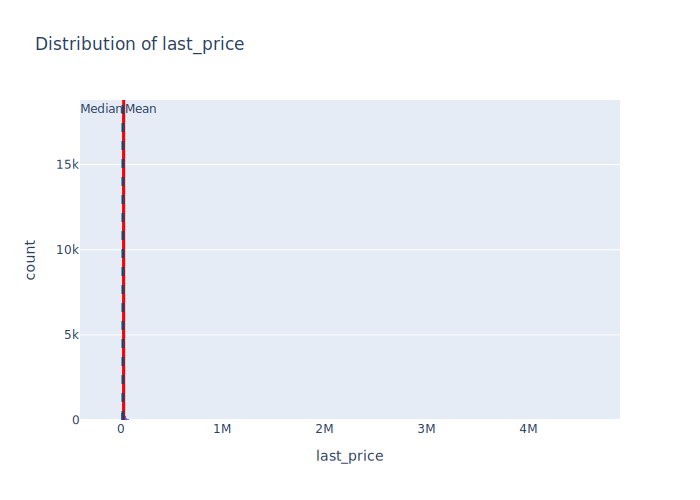

In [69]:
fig=px.histogram(
    rent_df,
    'last_price',
    title='Distribution of last_price')
fig.add_vline(x=np.mean(rent_df.last_price), 
              line_width=3, 
              line_color='red', 
              annotation_text='Mean',
              annotation_position='top right')
fig.add_vline(x=np.median(rent_df.last_price), 
              line_width=3,
              line_dash='dash',
              annotation_text='Median',
              annotation_position='top left')
fig.show("svg")

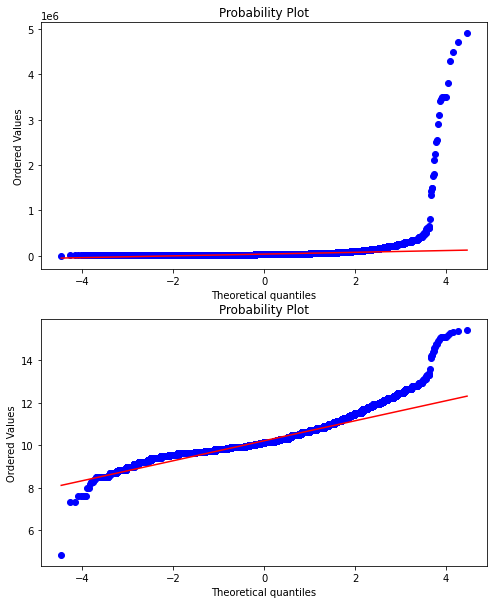

In [71]:
# observe that last_prices are not normally distributed
# transform them using log
fig, ax = plt.subplots(2, figsize = (8,10))
stats.probplot(rent_df['last_price'], dist="norm", plot=ax[0])
stats.probplot(np.log(rent_df['last_price']), dist="norm", plot=ax[1])
fig.show()

In [72]:
# add log transformation to last_price
rent_df['log_last_price'] = np.log(rent_df.last_price)

#### Proper viz for usual and cleaned rent data

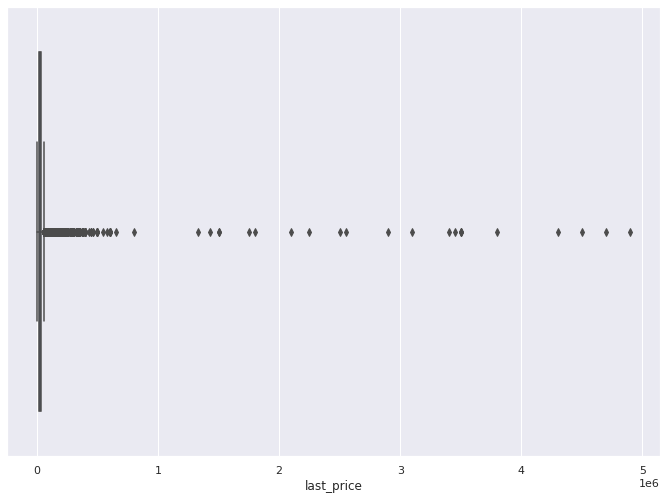

In [73]:
# easier to identify outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=rent_df['last_price']);

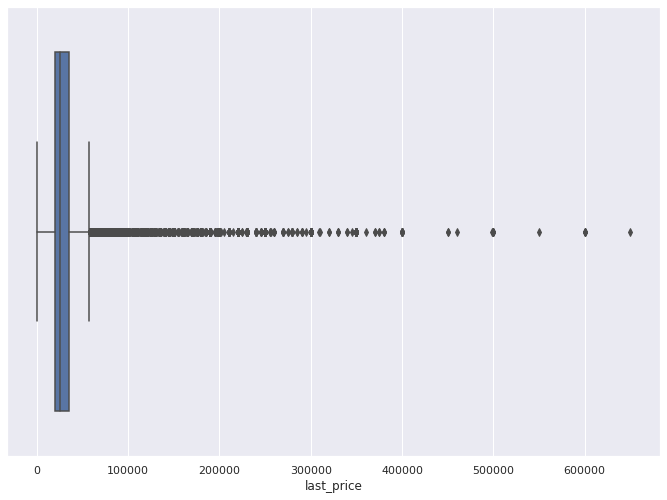

In [74]:
# maybe we have to work more wit outliers
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=rent_df_cleaned['last_price']);

In [75]:
# another outliers approach
import scipy.stats

iqr=scipy.stats.iqr(rent_df['last_price'], axis=0)
q1=np.quantile(rent_df['last_price'], .25, axis=0)
q3=np.quantile(rent_df['last_price'], .75, axis=0)

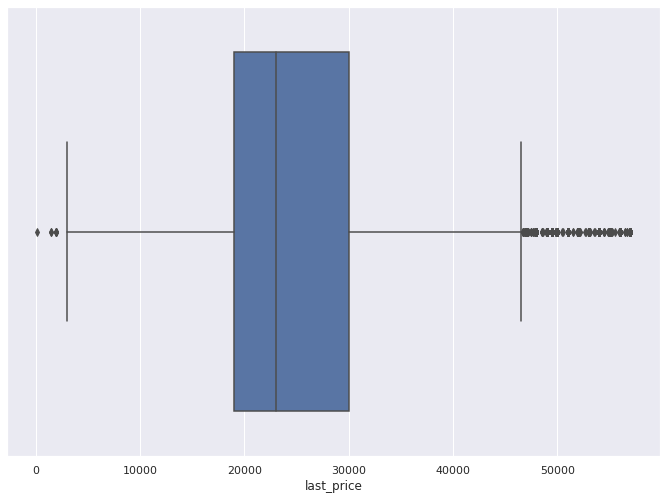

In [76]:
# better
rent_df_cleaned_new = rent_df[(rent_df.last_price > q1-1.5*iqr) & (rent_df.last_price < q3+1.5*iqr)]
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x=rent_df_cleaned_new['last_price']);

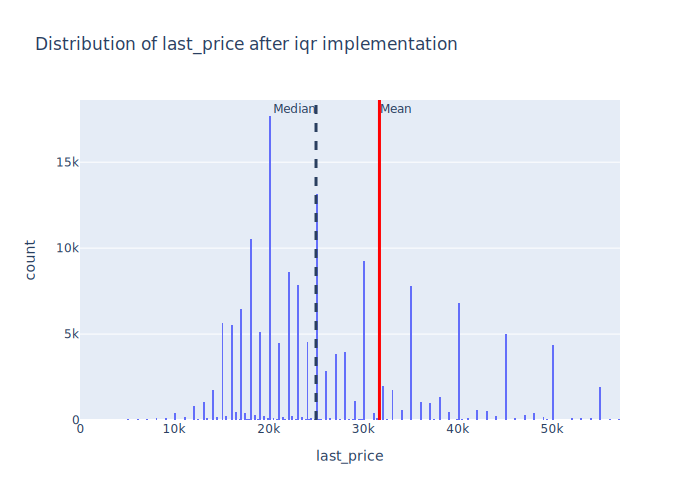

In [77]:
# there are interesting pattern that the prices stick to more 'rounded' value like 30k, 40k
fig=px.histogram(
    rent_df_cleaned_new,
    'last_price',
    title='Distribution of last_price after iqr implementation')
fig.add_vline(x=np.mean(rent_df.last_price), 
              line_width=3, 
              line_color='red', 
              annotation_text='Mean',
              annotation_position='top right')
fig.add_vline(x=np.median(rent_df.last_price), 
              line_width=3,
              line_dash='dash',
              annotation_text='Median',
              annotation_position='top left')
fig.show("svg")

In [78]:
rent_df_cleaned_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157659 entries, 0 to 171185
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_id                157659 non-null  int64  
 1   first_day_exposition    157659 non-null  object 
 2   last_day_exposition     157659 non-null  object 
 3   last_price              157659 non-null  float64
 4   floor                   157659 non-null  int64  
 5   open_plan               157659 non-null  bool   
 6   rooms                   157659 non-null  int64  
 7   studio                  157659 non-null  bool   
 8   area                    157659 non-null  float64
 9   kitchen_area            116628 non-null  float64
 10  living_area             122130 non-null  float64
 11  agent_fee               121419 non-null  float64
 12  renovation              103375 non-null  float64
 13  offer_type              157659 non-null  int64  
 14  category_type       

In [79]:
rent_df_cleaned_new['spb_flg'] = np.where(rent_df_cleaned_new.unified_address.str.contains('Россия, Санкт-Петербург'), 'SPb', 'LenOblast')

/tmp/ipykernel_76/530680534.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



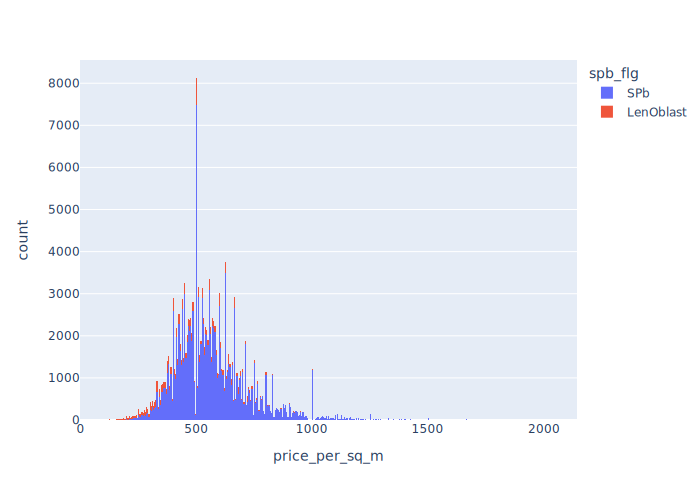

In [80]:
# prices per sq. metres do not differ from each other for SPb and LenOblast
fig = px.histogram(rent_df_cleaned_new, x="price_per_sq_m", color="spb_flg")
fig.show("svg")

In [81]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = rent_df_cleaned_new.select_dtypes(include=numerics)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157659 entries, 0 to 171185
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_id                157659 non-null  int64  
 1   last_price              157659 non-null  float64
 2   floor                   157659 non-null  int64  
 3   rooms                   157659 non-null  int64  
 4   area                    157659 non-null  float64
 5   kitchen_area            116628 non-null  float64
 6   living_area             122130 non-null  float64
 7   agent_fee               121419 non-null  float64
 8   renovation              103375 non-null  float64
 9   offer_type              157659 non-null  int64  
 10  category_type           157659 non-null  int64  
 11  building_id             157659 non-null  int64  
 12  price_per_sq_m          157659 non-null  float64
 13  house_price_sqm_median  157659 non-null  float64
 14  log_last_price      

In [82]:
newdf.drop(['offer_id', 'house_price_sqm_median', 'price_per_sq_m', 'building_id'], axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



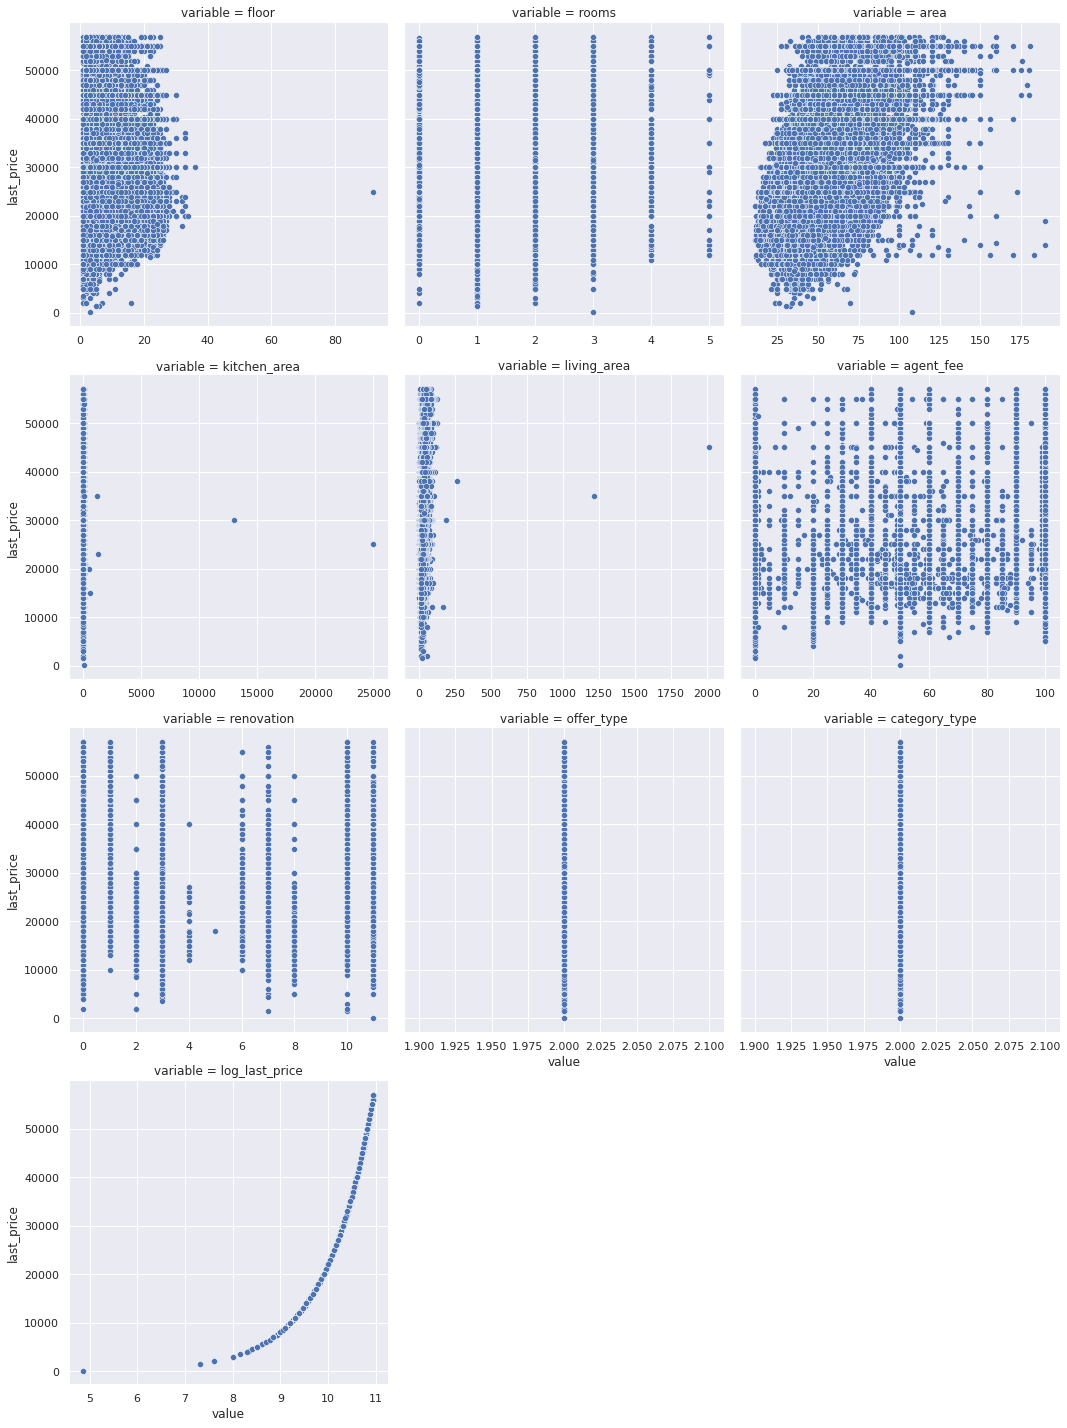

In [83]:
# linear relationships analysis
# seems to be fair to incude non-linear components in a predictive model for floor, area
sns.relplot(data=newdf.melt(id_vars=['last_price']),
            x='value', y='last_price', col='variable', col_wrap=3, 
            facet_kws=dict(sharex=False)
           );

<AxesSubplot:>

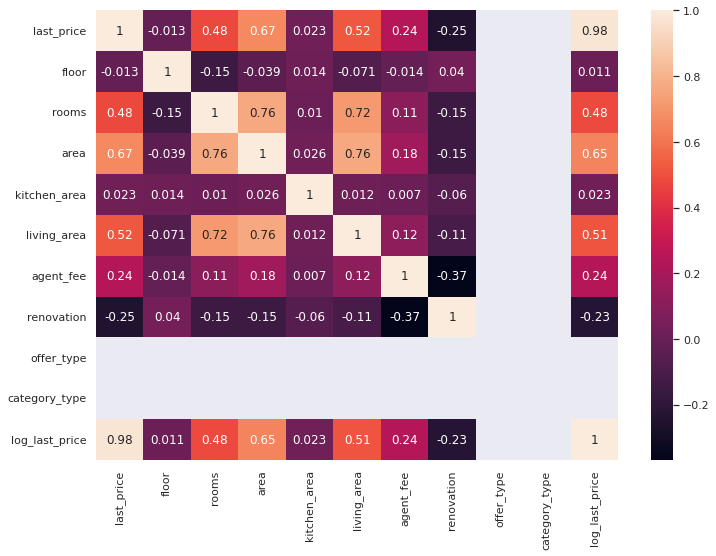

In [84]:
# such features as kitchen_area, agent_fee, renovation, offer_type, category_type, living_area can be excluded
# such that they do not affect last_price
sns.heatmap(newdf.corr(), annot=True)

In [85]:
rent_df_cleaned_new.drop(['offer_id', 
                          'house_price_sqm_median', 
                          'price_per_sq_m', 
                          'building_id',
                          'kitchen_area',
                          'living_area',
                          'agent_fee', 
                          'renovation',
                          'offer_type', 
                          'category_type'], axis=1, inplace=True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
# checking for missing values
(rent_df_cleaned_new.isna().sum() / len(rent_df_cleaned_new)).rename('percent of NA').to_frame().style.bar(vmax=1, vmin=0).format('{:.2%}')

,percent of NA
first_day_exposition,0.00%
last_day_exposition,0.00%
last_price,0.00%
floor,0.00%
open_plan,0.00%
rooms,0.00%
studio,0.00%
area,0.00%
unified_address,0.00%
log_last_price,0.00%


In [87]:
rent_df_cleaned_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157659 entries, 0 to 171185
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_day_exposition  157659 non-null  object 
 1   last_day_exposition   157659 non-null  object 
 2   last_price            157659 non-null  float64
 3   floor                 157659 non-null  int64  
 4   open_plan             157659 non-null  bool   
 5   rooms                 157659 non-null  int64  
 6   studio                157659 non-null  bool   
 7   area                  157659 non-null  float64
 8   unified_address       157659 non-null  object 
 9   log_last_price        157659 non-null  float64
 10  spb_flg               157659 non-null  object 
dtypes: bool(2), float64(3), int64(2), object(4)
memory usage: 12.3+ MB


In [88]:
# open_plan and studio to dummies
rent_df_cleaned_new.open_plan = np.where(rent_df_cleaned_new.open_plan==True, 1, 0)
rent_df_cleaned_new.studio = np.where(rent_df_cleaned_new.studio==True, 1, 0)
rent_df_cleaned_new.spb_flg = np.where(rent_df_cleaned_new.studio==True, 1, 0)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [89]:
rent_df_cleaned_new.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,unified_address,log_last_price,spb_flg
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,7,0,1,0,28.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.903488,0
1,2015-11-17T00:00:00+03:00,2016-03-04T00:00:00+03:00,24000.0,4,0,2,0,59.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",10.085809,0
2,2015-11-17T00:00:00+03:00,2016-04-24T00:00:00+03:00,18000.0,6,0,1,0,36.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.798127,0
3,2016-02-04T00:00:00+03:00,2016-02-28T00:00:00+03:00,18000.0,8,0,1,0,39.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.798127,0
4,2016-02-28T00:00:00+03:00,2016-04-02T00:00:00+03:00,19000.0,3,0,1,0,36.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.852194,0


### Self-control stops
1. What other factors might influence price? Think of the factors which can be actually calculated and included in the model.

In [90]:
rent_df_cleaned_new.last_day_exposition=pd.to_datetime(rent_df_cleaned_new.last_day_exposition)

/opt/conda/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
# process dates for last day exposition (because we'd like to predict last prices)
rent_df_cleaned_new['month'] = rent_df_cleaned_new.last_day_exposition.dt.month
rent_df_cleaned_new['day'] = rent_df_cleaned_new.last_day_exposition.dt.day
rent_df_cleaned_new['year'] = rent_df_cleaned_new.last_day_exposition.dt.year
rent_df_cleaned_new['dayofweek'] = rent_df_cleaned_new.last_day_exposition.dt.dayofweek
rent_df_cleaned_new['weekday'] = rent_df_cleaned_new.last_day_exposition.dt.weekday

/tmp/ipykernel_76/1064830254.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_76/1064830254.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_76/1064830254.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_76/1064830

In [92]:
rent_df_cleaned_new.head()

,first_day_exposition,last_day_exposition,last_price,floor,open_plan,rooms,studio,area,unified_address,log_last_price,spb_flg,month,day,year,dayofweek,weekday
0,2015-01-24T00:00:00+03:00,2016-01-19 00:00:00+03:00,20000.0,7,0,1,0,28.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.903488,0,1,19,2016,1,1
1,2015-11-17T00:00:00+03:00,2016-03-04 00:00:00+03:00,24000.0,4,0,2,0,59.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",10.085809,0,3,4,2016,4,4
2,2015-11-17T00:00:00+03:00,2016-04-24 00:00:00+03:00,18000.0,6,0,1,0,36.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.798127,0,4,24,2016,6,6
3,2016-02-04T00:00:00+03:00,2016-02-28 00:00:00+03:00,18000.0,8,0,1,0,39.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.798127,0,2,28,2016,6,6
4,2016-02-28T00:00:00+03:00,2016-04-02 00:00:00+03:00,19000.0,3,0,1,0,36.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1",9.852194,0,4,2,2016,5,5
